In [199]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.2


In [200]:
column_names = []
column_names.append('start_price')
column_names.append('high_price')
column_names.append('low_price')
column_names.append('end_price')
column_names.append('volume')
for i in range(119):
    column_names.append('{}_minutes_ago_start_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_high_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_low_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_end_price'.format(str(i+1)))
    column_names.append('{}_minutes_ago_volume'.format(str(i+1)))
column_names.append('after_5_minutes_price')
column_names
len(column_names)

601

In [201]:
raw_dataset = pd.read_csv('./data/use_volume.csv', names=column_names, na_values='?', comment='\t',sep=',', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,start_price,high_price,low_price,end_price,volume,1_minutes_ago_start_price,1_minutes_ago_high_price,1_minutes_ago_low_price,1_minutes_ago_end_price,1_minutes_ago_volume,...,118_minutes_ago_high_price,118_minutes_ago_low_price,118_minutes_ago_end_price,118_minutes_ago_volume,119_minutes_ago_start_price,119_minutes_ago_high_price,119_minutes_ago_low_price,119_minutes_ago_end_price,119_minutes_ago_volume,after_5_minutes_price
2022-06-20 14:26:00,2785000,2785946,2781781,2781927,2.631000,2785000,2785859,2784999,2784999,1.888410,...,2772865,2766187,2768876,7.376295,2783658,2783658,2772785,2775000,2.715846,2784718
2022-06-20 14:27:00,2781927,2783833,2781789,2783328,1.252800,2785000,2785946,2781781,2781927,2.631000,...,2770817,2761724,2761724,2.213304,2772785,2772865,2766187,2768876,7.376295,2787004
2022-06-20 14:28:00,2783833,2786300,2782015,2786300,2.604332,2781927,2783833,2781789,2783328,1.252800,...,2764181,2761000,2763621,0.630978,2770000,2770817,2761724,2761724,2.213304,2797570
2022-06-20 14:29:00,2785185,2785208,2785185,2785207,0.022000,2783833,2786300,2782015,2786300,2.604332,...,2768470,2762243,2767064,3.609532,2763061,2764181,2761000,2763621,0.630978,2800142
2022-06-20 14:30:00,2785208,2786000,2785081,2785101,0.480760,2785185,2785208,2785185,2785207,0.022000,...,2769327,2764326,2769197,1.504600,2764181,2768470,2762243,2767064,3.609532,2799838


In [202]:
train_dataset = dataset.sample(frac=0.9, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [203]:
train_stats = train_dataset.describe()
train_stats.pop("after_5_minutes_price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
start_price,12918.0,3.084952e+06,468531.401037,2379634.000,2.756496e+06,2.912678e+06,3.543923e+06,4.040215e+06
high_price,12918.0,3.087937e+06,468064.298083,2383132.000,2.758184e+06,2.916478e+06,3.549864e+06,4.041600e+06
low_price,12918.0,3.081951e+06,468905.086087,2377167.000,2.754937e+06,2.909020e+06,3.539465e+06,4.034901e+06
end_price,12918.0,3.084885e+06,468487.282037,2377777.000,2.756482e+06,2.912992e+06,3.543200e+06,4.040215e+06
volume,12918.0,3.523257e+00,4.517392,0.001,8.459104e-01,2.300632e+00,4.557117e+00,1.058081e+02
...,...,...,...,...,...,...,...,...
119_minutes_ago_start_price,12918.0,3.095070e+06,475067.874511,2380979.000,2.756684e+06,2.920230e+06,3.639084e+06,4.040215e+06
119_minutes_ago_high_price,12918.0,3.098037e+06,474572.444753,2383132.000,2.758289e+06,2.923820e+06,3.642139e+06,4.041600e+06
119_minutes_ago_low_price,12918.0,3.092046e+06,475478.503701,2377167.000,2.755000e+06,2.917126e+06,3.636129e+06,4.034901e+06
119_minutes_ago_end_price,12918.0,3.094962e+06,475029.320643,2377777.000,2.756510e+06,2.920411e+06,3.638490e+06,4.040215e+06


In [204]:
train_labels = train_dataset.pop('after_5_minutes_price')
test_labels = test_dataset.pop('after_5_minutes_price')

In [205]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [239]:
def build_model():
  model = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [240]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 2)                 1202      
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 3         
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


In [241]:
example_batch = normed_train_data[:10]
example_batch

,start_price,high_price,low_price,end_price,volume,1_minutes_ago_start_price,1_minutes_ago_high_price,1_minutes_ago_low_price,1_minutes_ago_end_price,1_minutes_ago_volume,...,118_minutes_ago_start_price,118_minutes_ago_high_price,118_minutes_ago_low_price,118_minutes_ago_end_price,118_minutes_ago_volume,119_minutes_ago_start_price,119_minutes_ago_high_price,119_minutes_ago_low_price,119_minutes_ago_end_price,119_minutes_ago_volume
2022-06-13 00:33:00,1.111136,1.107930,1.104807,1.105016,0.349981,1.109217,1.109109,1.114724,1.114499,-0.356526,...,1.196458,1.191436,1.198335,1.193339,-0.714981,1.194800,1.192881,1.198119,1.196401,-0.654616
2022-06-17 01:28:00,-0.773133,-0.777249,-0.766517,-0.772572,-0.189266,-0.768163,-0.775138,-0.768964,-0.775909,-0.251363,...,-0.853016,-0.832238,-0.845919,-0.824989,0.934090,-0.855429,-0.859467,-0.848331,-0.853022,-0.655033
2022-06-12 21:36:00,1.273411,1.279002,1.278797,1.284361,-0.134661,1.282146,1.277048,1.266132,1.274285,0.226237,...,1.288562,1.283640,1.285963,1.281566,-0.022260,1.299048,1.294712,1.298285,1.293380,-0.682645
2022-06-15 19:20:00,-0.414459,-0.416934,-0.426414,-0.418144,-0.489218,-0.425662,-0.422861,-0.430786,-0.425996,-0.529927,...,-0.673290,-0.679155,-0.686036,-0.692818,-0.551413,-0.673573,-0.680527,-0.674098,-0.677324,-0.548357
2022-06-16 06:44:00,-0.349915,-0.349197,-0.350644,-0.352558,0.392104,-0.354221,-0.353344,-0.351619,-0.346538,0.236182,...,-0.248202,-0.248403,-0.243489,-0.245264,0.245583,-0.237509,-0.242350,-0.244866,-0.251234,0.295126
2022-06-14 01:54:00,-0.553024,-0.555972,-0.555308,-0.562067,1.159604,-0.544617,-0.545129,-0.551051,-0.554319,1.516205,...,-0.142557,-0.148945,-0.152019,-0.155854,0.113766,-0.163997,-0.148651,-0.158982,-0.147053,0.178787
2022-06-11 07:41:00,1.828842,1.824885,1.833786,1.829751,-0.768531,1.828443,1.823886,1.833391,1.828752,-0.773850,...,1.783093,1.778670,1.787836,1.783399,-0.780510,1.782649,1.778258,1.787468,1.783021,-0.777638
2022-06-10 21:32:00,1.784933,1.786830,1.789911,1.785295,-0.381472,1.784520,1.779920,1.786803,1.782123,-0.781834,...,1.717165,1.716683,1.713320,1.708812,-0.471396,1.722289,1.724431,1.721604,1.717095,-0.379949
2022-06-18 21:59:00,-1.235262,-1.242871,-1.237066,-1.236162,-0.161745,-1.250215,-1.241444,-1.242845,-1.235231,1.036981,...,-1.382344,-1.383769,-1.379424,-1.383599,-0.561973,-1.381712,-1.388046,-1.380879,-1.382348,0.595950
2022-06-17 18:04:00,-0.657984,-0.665017,-0.658156,-0.665007,-0.593984,-0.664437,-0.665048,-0.657534,-0.662644,-0.629257,...,-0.637866,-0.640053,-0.630961,-0.636728,-0.100207,-0.646781,-0.644409,-0.642898,-0.640743,0.061576


In [242]:
example_result = model.predict(example_batch)
example_result

array([[0.11123101],
       [0.        ],
       [0.11166944],
       [0.12088393],
       [0.01365595],
       [0.11907111],
       [0.16182749],
       [0.14174865],
       [0.        ],
       [0.        ]], dtype=float32)

In [243]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 4000

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [244]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1247,183077936.0,9460.204102,183077936.0,179884880.0,9303.668945,179884880.0,1247
1248,182866528.0,9460.730469,182866528.0,207229024.0,10385.125000,207229024.0,1248
1249,182863584.0,9480.229492,182863584.0,181905840.0,9380.751953,181905840.0,1249
1250,182515344.0,9421.170898,182515344.0,181387728.0,9173.184570,181387728.0,1250
1251,182930464.0,9471.105469,182930464.0,188303888.0,9474.041992,188303888.0,1251


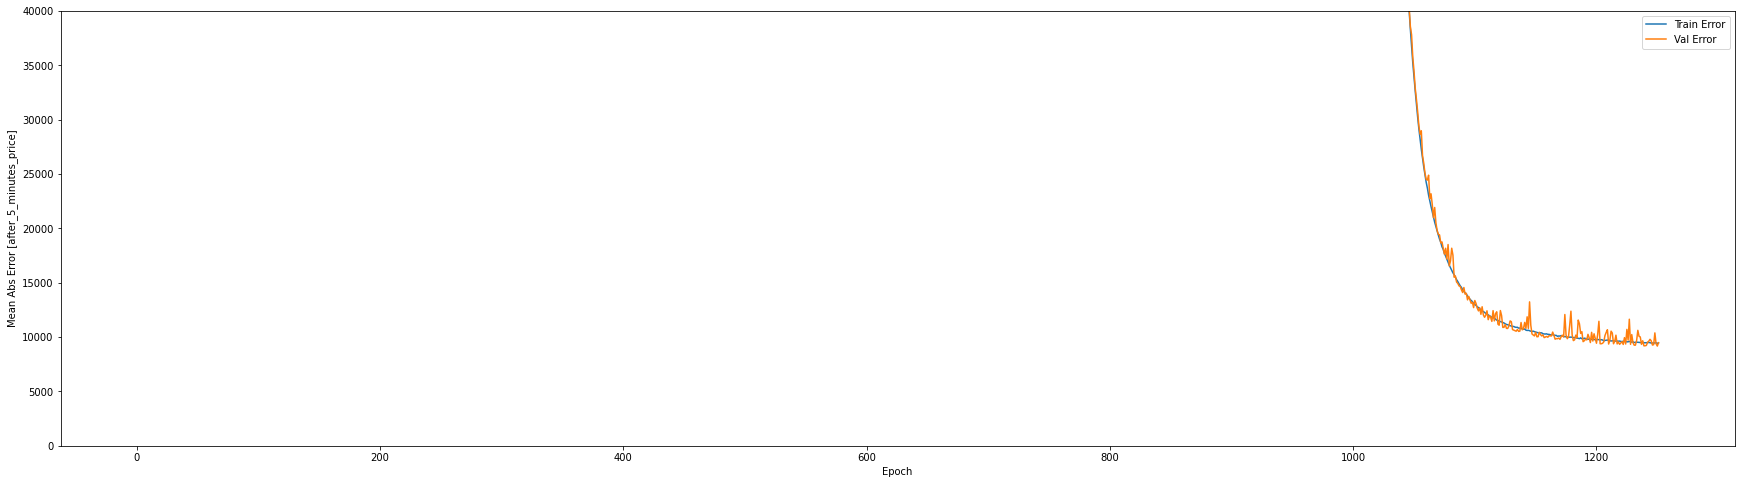

In [245]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(30,8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [after_5_minutes_price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()

  # plt.figure(figsize=(6,4))
  # plt.xlabel('Epoch')
  # plt.ylabel('Mean Square Error [$after_5_minutes_price^2$]')
  # plt.plot(hist['epoch'], hist['mse'],
  #          label='Train Error')
  # plt.plot(hist['epoch'], hist['val_mse'],
  #          label = 'Val Error')
  # plt.ylim([0,20])
  # plt.legend()
  plt.show()

plot_history(history)

In [246]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} after_5_minutes_price".format(mae))

45/45 - 0s - loss: 178250176.0000 - mae: 9363.3926 - mse: 178250176.0000
Testing set Mean Abs Error: 9363.39 after_5_minutes_price


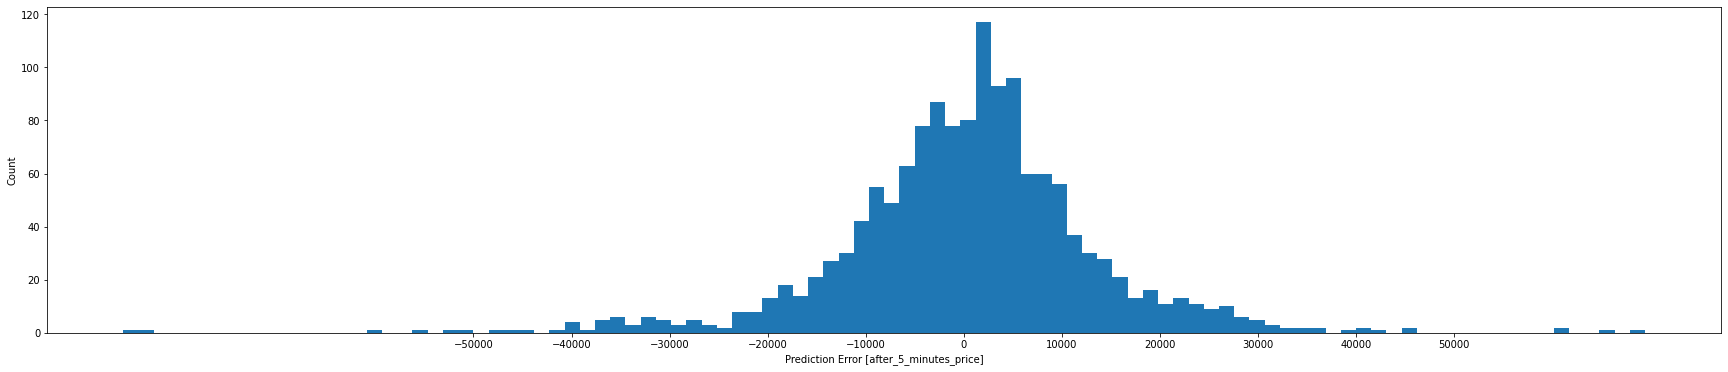

In [247]:
test_predictions = model.predict(normed_test_data).flatten()
error = test_predictions - test_labels
plt.figure(figsize=(30,6))
plt.xticks([-50000, -40000, -30000, -20000, -10000, 0, 10000, 20000, 30000, 40000, 50000])
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [after_5_minutes_price]")
_ = plt.ylabel("Count")